<a href="https://colab.research.google.com/github/sifatbhuiyan0909/dse-sentiment-cascades/blob/main/DSE_Sentiment__Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

# Re-establishing the Full Research Corpus
BULLISH = "uthbe tanbe agabe dourabe chutbe ural-dibe jumping pick-up rocket bullet sprint lift-up uthani goti upor-mukhi high-speed push-korbe ure-jabe dhapa-dhap tane-tane boom blast toofan bumper power-up garom agun kapaibe strong heavy force bishal khela-hobe guti-chal jackpot breakout gap-up upper-circuit bull-run support-nise green-candle rsi-high golden-cross reversal accumulation volume-blast resistance-break base-build trend-change blue-sky phulbe dhan-tana boro-mach ghorar-dour shikhore chand-e asman-e pahar khulbe chok-choke ujan-bela joar bar-ti shorgorom chaka-ghura ladder-up peak-mukh uth-bos shorgo haturi kari-kari dhor-dhor buy-entry hold-profit target-high positive-vibes greed-on fomo-rise panic-buy sera-dour long-term daily-high closing-up demand-beshi barano uthano tahano upar-pathano khulano jora-tali daka hasano nachano sajano agune-fela uporer-shaari dhap-uthan shokti-shali finish-high"
BEARISH = "nambe porbe namani poton dhos nicher-mukh sliding falling niche-jabe tola-khujche dhal ghotbe choto-hobe khaitye-jabe dubbe crash dhash-kore thash-kore blood-bath free-fall dhum-kore phash blast-down tolaitese dubaise khaoaise bash-khaoya chure-mara dump-kora tanking red-candle lower-circuit gap-down correction break-down support-break dead-cat-bounce overbought-correction rsi-drop bear-run death-cross pull-back resistance-rejection negative-zone trend-reversal panic-sell hotasha atke-geshi lal-batti bhoy confidence-low loss-khawa pura-lal ghum-nai kopal-pora z-category-feeling sell-pressure exit-mara liquidation shes-hoye-gelam pichlaitese berjal tola-nai muri-muzki fokir-hoya rokto-nodi ondhokar pathor-poro bhat-nai borof-hola nidan-kal gorto khad shukiye-jawa bati-gul khamchi namano dabaite-che shorano kapa-kapi chas-deya dhub-deya ulat-palat pichone-jawa niche-thela kete-fela jol-hoya gat-mara choto-kora mora-stock value-erosion sell-off profit-booking unloading bear-trap wash-out deep-red market-drag shorting namar-shuru"
NEUTRAL = "khelche sideways steady flat dhit thame-ache ek-i-jaygay stable nora-chora-nai shorol-rekha nishpap thitano stuck range-bound fixed consolidation accumulation wait-and-watch base-banaitese time-pass chupi-chupi shanti hold-e-ache next-move-er-opekkha sustho-obostha base-camp rest-nitese pani-mapa nirupay slow-motion ghurpak hatamati volatile-neutral up-down asha-jawya jhula dolyaman uncertain mix-signal nara-chara kapa-kapi bouncing jol-ghola zig-zag tana-tani boring no-trade-zone neutral-mood shorgo-morto hata-hati guti-shajano opekkhar-pala signal-nai bose-thaka dry-market breakeven-point low-volume sideways-trend price-tightening equilibrium neutral-gear no-trend horizontal-move nodir-moto batash-nai adbhut-shanti bondho-duar majh-pothe sthir achol goti-hin shatar-kata khuchra-khel dhire-susthe nishtejo thanda-matha eka-beka pore-thaka jem-hoye-ache soman-tale finish-neutral"

def build_full_lexicon():
    data = []
    # Process Bullish (0.7)
    for w in set(BULLISH.split()):
        data.append({'word': w, 'sentiment_score': 1.0 if w in ['rocket', 'toofan', 'boom'] else 0.7, 'category': 'Bullish'})
    # Process Bearish (-0.7)
    for w in set(BEARISH.split()):
        data.append({'word': w, 'sentiment_score': -1.0 if w in ['dhos', 'blood-bath', 'crash'] else -0.7, 'category': 'Bearish'})
    # Process Neutral (0.0)
    for w in set(NEUTRAL.split()):
        data.append({'word': w, 'sentiment_score': 0.0, 'category': 'Neutral'})
    return pd.DataFrame(data)

# SAVE IT
full_df = build_full_lexicon()
full_df.to_csv('/content/drive/MyDrive/Colab Notebooks/lexicon.csv', index=False)

print(f" FOUNDATION RESTORED: {len(full_df)} words are now in lexicon.csv")

 FOUNDATION RESTORED: 280 words are now in lexicon.csv


In [7]:
import re

def clean_banglish_text(text):
    # 1. Lowercase (Essential for lexicon matching)
    text = str(text).lower()
    # 2. Remove URLs/Links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # 3. Remove Punctuation (!!!, ???, ...)
    text = re.sub(r'[^\w\s]', '', text)
    # 4. Remove extra whitespace
    text = " ".join(text.split())
    return text

# Test it
test_comment = "Amar kache mone hoy market ROCKET hobe!!! 🚀🚀 check: http://dse.com"
print(f"Cleaned: {clean_banglish_text(test_comment)}")

Cleaned: amar kache mone hoy market rocket hobe check


In [8]:
# 1. Load the lexicon into a dictionary for speed
lexicon_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lexicon.csv')
lex_dict = dict(zip(lexicon_df.word, lexicon_df.sentiment_score))

# 2. The Scoring Function
def calculate_dse_sentiment(text):
    cleaned = clean_banglish_text(text)
    tokens = cleaned.split()

    # Sum the scores of words found in our lexicon
    score = sum(lex_dict.get(word, 0) for word in tokens)
    return score

# 3. Quick Test on DSE Scenarios
print(f"Bullish Score: {calculate_dse_sentiment('Market pura toofan rocket speed e uthbe')}")
print(f"Bearish Score: {calculate_dse_sentiment('Dhos nambe, blood-bath situation')}")

Bullish Score: 2.7
Bearish Score: -1.7


In [9]:

dse_posts= [
    "Ddse_postsSE index aajke pura toofan hobe rocket er moto!",
    "Market khub kharap, blood-bath obostha... dhos nambe.",
    "Stock stable ache, sideways moving.",
    "khela hobe!! index 7000 par hobe inshallah.",
    "Ato panic-sell keno koren? hold koren.",
    "Volume blast korbe next week e.",
    "Pura dhos, shesh hoye gelam.",
    "Next move er opekkha korchi, steady market.",
    "Buy entry nite paren, reversal ashteche.",
    "Z-category stock theke dure thakun, risk beshi."
]


results = []
for post in dse_posts:
    score = calculate_dse_sentiment(post)
    category = 'Bullish' if score > 0.3 else ('Bearish' if score < -0.3 else 'Neutral')
    results.append({'Post': post, 'Score': round(score, 2), 'Category': category})

results_df = pd.DataFrame(results)


display(results_df)

,Post,Score,Category
0,DSE index aajke pura toofan hobe rocket er moto!,2.0,Bullish
1,"Market khub kharap, blood-bath obostha... dhos...",-1.7,Bearish
2,"Stock stable ache, sideways moving.",0.0,Neutral
3,khela hobe!! index 7000 par hobe inshallah.,0.0,Neutral
4,Ato panic-sell keno koren? hold koren.,0.0,Neutral
5,Volume blast korbe next week e.,0.7,Bullish
6,"Pura dhos, shesh hoye gelam.",-1.0,Bearish
7,"Next move er opekkha korchi, steady market.",0.0,Neutral
8,"Buy entry nite paren, reversal ashteche.",0.7,Bullish
9,"Z-category stock theke dure thakun, risk beshi.",0.0,Neutral


/tmp/ipython-input-1875391110.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=results_df, x='Category', palette={'Bullish': 'green', 'Bearish': 'red', 'Neutral': 'gray'})


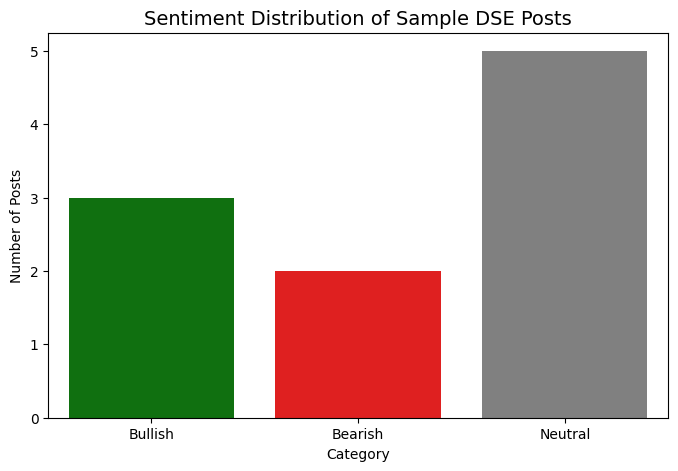

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=results_df, x='Category', palette={'Bullish': 'green', 'Bearish': 'red', 'Neutral': 'gray'})
plt.title('Sentiment Distribution of Sample DSE Posts', fontsize=14)
plt.ylabel('Number of Posts')
plt.show()